# Lecture 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Define the path where you want to save the dataset in your Google Drive
dataset_path = '/content/drive/MyDrive/bike_sharing_dataset.zip'

# Check if the file exists in your Google Drive
if not os.path.exists(dataset_path):
    !wget -O {dataset_path} https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
    !unzip {dataset_path} -d /content/
else:
    print("Dataset already exists. Skipping download and unzip.")


Dataset already exists. Skipping download and unzip.


In [3]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import set_config

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
!unzip {dataset_path} -d /content/

Archive:  /content/drive/MyDrive/bike_sharing_dataset.zip
  inflating: /content/Readme.txt     
  inflating: /content/day.csv        
  inflating: /content/hour.csv       


In [7]:
df = pd.read_csv('hour.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
for col in df.columns:
  print(col, df[col].nunique())

instant 17379
dteday 731
season 4
yr 2
mnth 12
hr 24
holiday 2
weekday 7
workingday 2
weathersit 4
temp 50
atemp 65
hum 89
windspeed 30
casual 322
registered 776
cnt 869


In [10]:
df['day_night'] = df['hr'].apply(lambda x : 'day' if 6 <= x <= 18 else 'night')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_night
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,night
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,night
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,night
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,night
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,night


In [11]:
df.drop(['instant', 'casual', 'registered'], axis = 1, inplace = True)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_night
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,night
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,night
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,night
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,night
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,night


In [12]:
df.drop(['atemp'], axis = 1, inplace = True)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day_night
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16,night
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40,night
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32,night
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13,night
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1,night


In [13]:
df['dteday'] = pd.to_datetime(df.dteday)
df['season'] = df.season.astype('category')
df['yr'] = df.yr.astype('category')
df['mnth'] = df.mnth.astype('category')
df['hr'] = df.hr.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['workingday'] = df.workingday.astype('category')
df['weathersit'] = df.weathersit.astype('category')

df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day_night
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16,night
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40,night
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32,night
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13,night
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1,night


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  category      
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  hum         17379 non-null  float64       
 11  windspeed   17379 non-null  float64       
 12  cnt         17379 non-null  int64         
 13  day_night   17379 non-null  object        
dtypes: category(8), datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 952.8+ KB


In [15]:
df.drop(columns = ['dteday'], inplace = True)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day_night
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16,night
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40,night
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32,night
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13,night
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1,night


In [16]:
X = df.drop(columns = ['cnt'])
y = df['cnt']

In [17]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,day_night
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,night
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,night
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,night
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,night
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,night


In [18]:
y.head()

,cnt
0,16
1,40
2,32
3,13
4,1


In [19]:
# Numerical Features
numerical_features = ['temp', 'hum', 'windspeed']
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', MinMaxScaler())
])

# Transforming above
X[numerical_features] = numerical_pipeline.fit_transform(X[numerical_features])

# Categorical Features
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, drop = 'first'))
])

# Transforming above
X_encoded = categorical_pipeline.fit_transform(X[categorical_features])

# Converting it to a dataframe
X_encoded = pd.DataFrame(X_encoded,
                         columns = categorical_pipeline.named_steps['onehot'].get_feature_names_out(categorical_features)
                         )

# Encoded categorical features + Numerical features
X = pd.concat([X.drop(columns = categorical_features), X_encoded], axis = 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
model = RandomForestRegressor(n_estimators=100, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<Axes: >

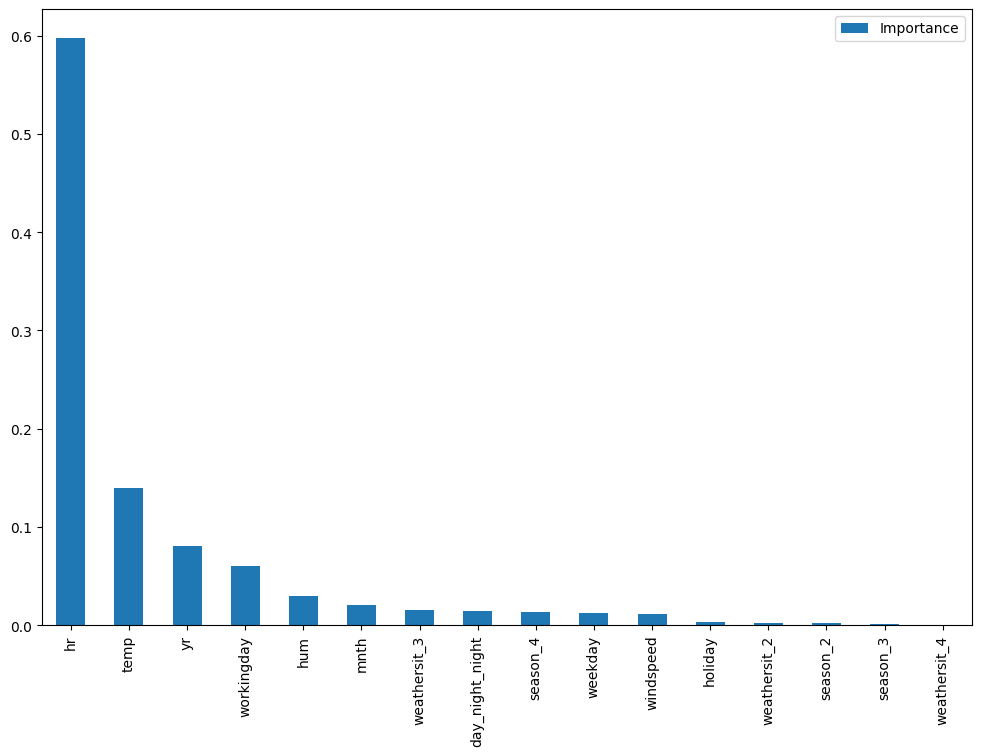

In [22]:
feat_importances = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns = ["Importance"])
feat_importances.sort_values(by = 'Importance', ascending = False, inplace = True)

# Plotting each feature importance
feat_importances.plot(kind = 'bar', figsize = (12, 8))

In [23]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1800.5660310965031
R-squared: 0.943137765937577


In [24]:
final_pipeline = Pipeline([
    ('num_preprocess', numerical_pipeline),
    ('cat_preprocess', categorical_pipeline),
    ('model', RandomForestRegressor(n_estimators=100, random_state = 42))
])

In [25]:
set_config(display = 'diagram')
final_pipeline

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('onehot',
                                  OneHotEncoder(drop='first',
                                                sparse_output=False))])),
                ('model', RandomForestRegressor(random_state=42))])

# Assignment 2

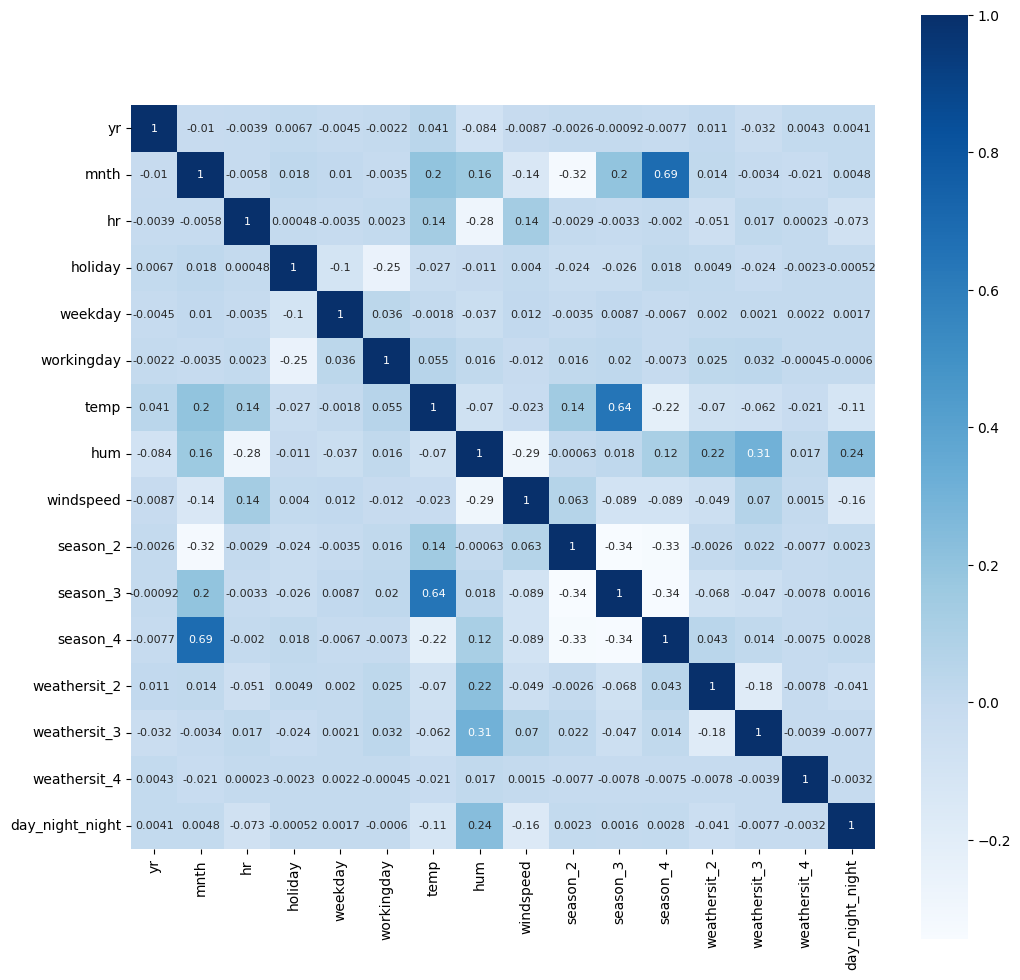

In [26]:
correlation_values = X.corr()
# plot correlation
plt.figure(figsize=(12,12))
sns.heatmap(correlation_values,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

**Temperature and Humidity Interaction:** Since both temperature and humidity affect perceived comfort and bike rental rates, creating an interaction feature can capture their joint effect.  
**Feeling Temperature and Wind Speed Interaction:** Similar to the above, this feature can capture how the combined effect of feeling temperature and wind speed impacts bike rentals.

In [27]:
X_1 = X.copy(deep = True)
y_1 = y.copy(deep = True)
X_1['temp_hum'] = X_1['temp'] * X_1['hum']
X_1['temp_windspeed'] = X_1['temp'] * X_1['windspeed']
X_1.describe()

,temp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4,day_night_night,temp_hum,temp_windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.486722,0.627229,0.223460,0.253697,0.258703,0.243512,0.261465,0.081650,0.000173,0.455492,0.302637,0.108110
std,0.196486,0.192930,0.143811,0.435139,0.437935,0.429214,0.439445,0.273839,0.013138,0.498029,0.145689,0.084113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.326531,0.480000,0.122840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174286,0.048328
50%,0.489796,0.630000,0.228047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.294694,0.093081
75%,0.653061,0.780000,0.298225,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.423265,0.153626
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.617551,0.795918


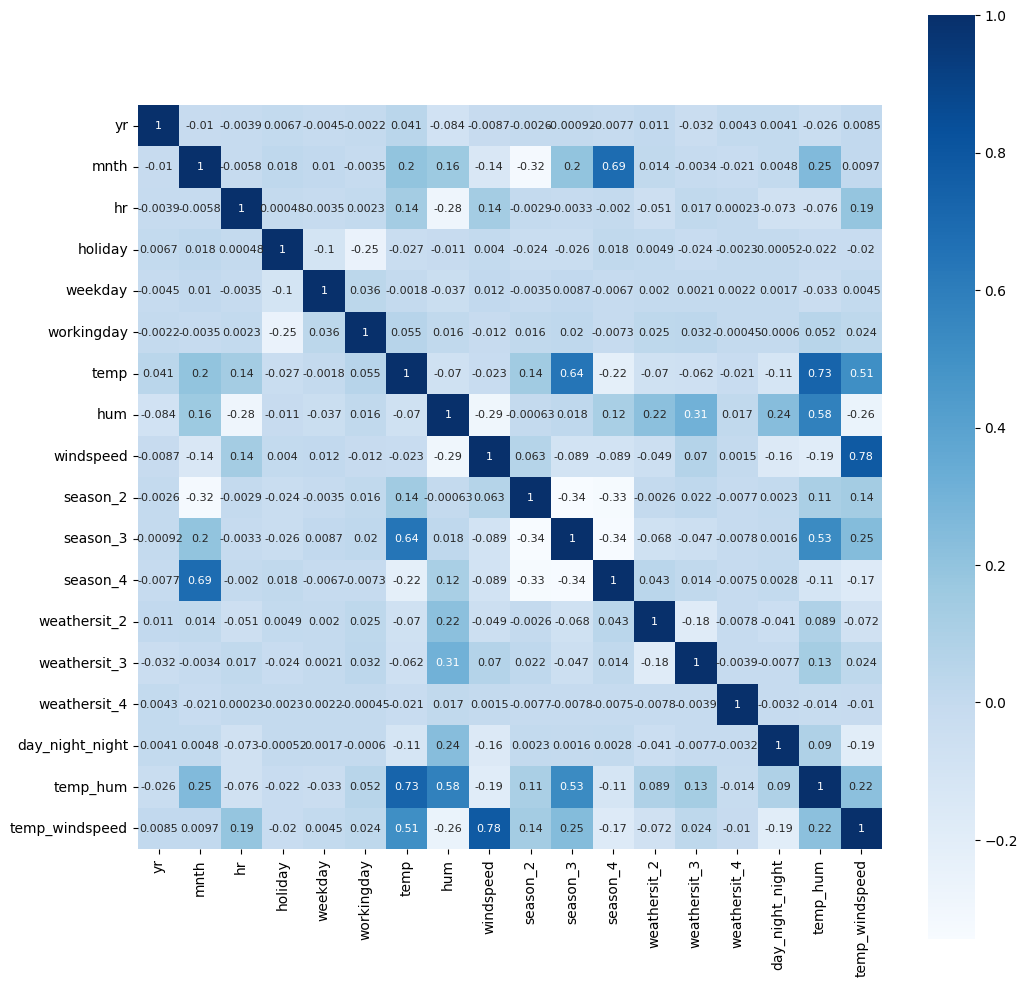

In [28]:
new_corr_values = X_1.corr()
# plot correlation
plt.figure(figsize=(12,12))
sns.heatmap(new_corr_values,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

In [29]:
def model_fn(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  model = RandomForestRegressor(n_estimators=100, random_state = 42)
  model.fit(X_train, y_train)
  feat_importances = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns = ["Importance"])
  feat_importances.sort_values(by = 'Importance', ascending = False, inplace = True)

  # Performance Metrics
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f'Mean Squared Error: {mse}')
  print(f'R-squared: {r2}')

  # Plotting each feature importance
  feat_importances.plot(kind = 'bar', figsize = (12, 8))

Mean Squared Error: 1838.256827315211
R-squared: 0.9419474830823118


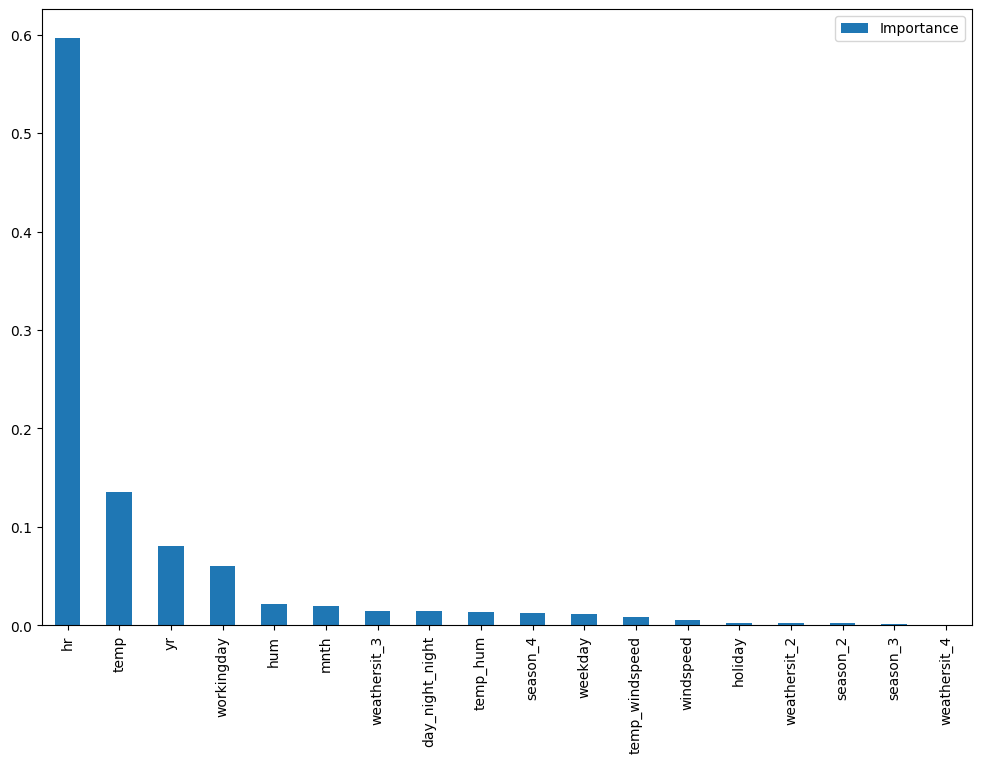

In [30]:
model_fn(X_1, y_1)

Both MSE and R-squared values have worsened. This could be caused by multicollinearity.

**Target Encoding**

In [53]:
X_2 = df.drop(columns = ['cnt'])
y_2 = df['cnt']
X_2.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,day_night
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,night
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,night
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,night
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,night
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,night


In [32]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [54]:
from category_encoders import TargetEncoder
# Numerical Features
X_2[numerical_features] = numerical_pipeline.fit_transform(X_2[numerical_features])

# Categorical Features
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
  ('targetenc', TargetEncoder())
])

# Transforming above
X_encoded = categorical_pipeline.fit_transform(X_2[categorical_features], y_2)

# Converting it to a dataframe
X_encoded = pd.DataFrame(X_encoded,
                         columns = categorical_pipeline.named_steps['targetenc'].get_feature_names_out(categorical_features),
                         index = X_2.index
                         )

# Encoded categorical features + Numerical features
X_2 = pd.concat([X_2.drop(columns = categorical_features), X_encoded], axis = 1)

In [55]:
X_2.columns = X_2.columns.astype(str)
X_2.head()

,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,0,1,2
0,0,1,0,0,6,0,0.224490,0.81,0.0,111.114569,204.869272,98.894138
1,0,1,1,0,6,0,0.204082,0.80,0.0,111.114569,204.869272,98.894138
2,0,1,2,0,6,0,0.204082,0.80,0.0,111.114569,204.869272,98.894138
3,0,1,3,0,6,0,0.224490,0.75,0.0,111.114569,204.869272,98.894138
4,0,1,4,0,6,0,0.224490,0.75,0.0,111.114569,204.869272,98.894138


Mean Squared Error: 1772.8193856233377
R-squared: 0.9440140105307183


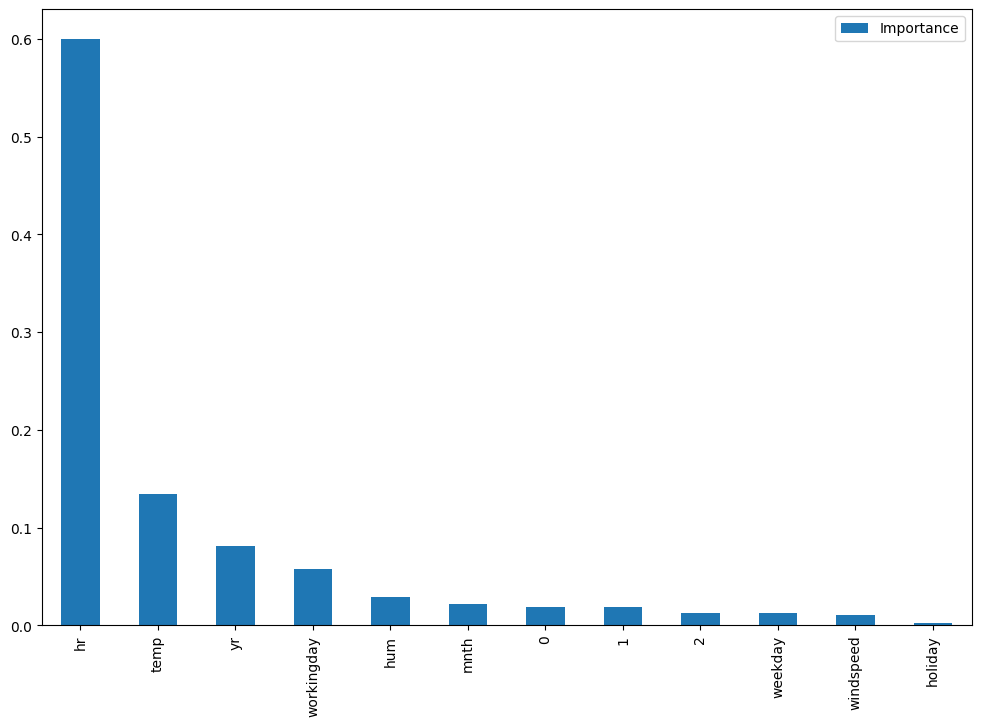

In [35]:
model_fn(X_2, y_2)

In [56]:
pipeline_2 = Pipeline([
    ('num_preprocess', numerical_pipeline),
    ('cat_preprocess', categorical_pipeline),
    ('model', RandomForestRegressor(n_estimators=100, random_state = 42))
])

set_config(display = 'diagram')
pipeline_2

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('targetenc',
                                  TargetEncoder(cols=[0, 1, 2]))])),
                ('model', RandomForestRegressor(random_state=42))])

# **Linear Regression**

**Using the package**

In [49]:
# Converting all categorical features to Numerical feature for linear regression
def cat_fn(X):
  # Check if there are any remaining categorical columns
  categorical_columns = X.select_dtypes(include=['category']).columns

  # Convert categorical columns to numeric if needed
  if len(categorical_columns) > 0:
      X[categorical_columns] = X[categorical_columns].apply(pd.to_numeric)

  return X

In [50]:
X_3 = X.copy(deep = True)
y_3 = y.copy(deep = True)

X_3 = cat_fn(X_3)

# Now, X_train should only contain numeric data
print(X_3.dtypes)

yr                   int64
mnth                 int64
hr                   int64
holiday              int64
weekday              int64
workingday           int64
temp               float64
hum                float64
windspeed          float64
season_2           float64
season_3           float64
season_4           float64
weathersit_2       float64
weathersit_3       float64
weathersit_4       float64
day_night_night    float64
dtype: object


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

reg = LinearRegression().fit(X_train, y_train)

In [38]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 14913.963635131073
R-squared: 0.5290140564837549


In [57]:
pipeline_3 = Pipeline([
    ('num_preprocess', numerical_pipeline),
    ('cat_preprocess', cat_fn),
    ('model', LinearRegression())
])

set_config(display = 'diagram')
pipeline_3

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess', <function cat_fn at 0x7c893eb38040>),
                ('model', LinearRegression())])

**Linear Regression Using BGD From Scratch**

In [39]:
class MultipleLinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def predict(self, X):
        return np.dot(X, self.coefficients) + self.intercept

    def train(self, X, y, learning_rate=0.01, epochs=1000):
        # Initialize coefficients and intercept
        num_samples, num_features = X.shape
        self.coefficients = np.zeros(num_features)
        self.intercept = 0

        for _ in range(epochs):
            # Predict the values
            y_predicted = self.predict(X)

            # Calculate the gradients
            d_coefficients = -(2/num_samples) * np.dot(X.T, (y - y_predicted))
            d_intercept = -(2/num_samples) * np.sum(y - y_predicted)

            # Update the parameters
            self.coefficients -= learning_rate * d_coefficients
            self.intercept -= learning_rate * d_intercept

        return self.coefficients, self.intercept


In [40]:
model = MultipleLinearRegression()
coefficients, intercept = model.train(X_train, y_train, learning_rate=0.000001, epochs=10000)

In [41]:
# Make predictions
y_pred = model.predict(X_test)

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Predictions:", y_pred)

Coefficients: [ 9.18265228e-01  6.33856894e+00  1.14731253e+01  6.01850630e-03
  2.71291903e+00  6.52084950e-01  6.77273803e-01  3.92359402e-01
  2.27860622e-01  3.60309279e-01  4.47416177e-01  1.80338070e-01
  1.81603033e-01 -5.94739232e-02 -1.92151249e-04 -3.76991368e-01]
Intercept: 0.8959032863928907
Predictions: [274.87985569 240.33006887 101.79011837 ... 161.82292589 189.83295683
 301.27294598]


In [42]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 26175.411623790893
R-squared: 0.17337528492311527


In [51]:
pipeline_4 = Pipeline([
    ('num_preprocess', numerical_pipeline),
    ('cat_preprocess', cat_fn),
    ('model', MultipleLinearRegression())
])

set_config(display = 'diagram')
pipeline_4

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess', <function cat_fn at 0x7c893eb38040>),
                ('model',
                 <__main__.MultipleLinearRegression object at 0x7c89481e54e0>)])

**Linear Regression Using SGD From Scratch**

In [43]:
class MultipleLinearRegressionSGD:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def predict(self, X):
        return np.dot(X, self.coefficients) + self.intercept

    def train(self, X, y, learning_rate=0.01, epochs=1000):

        # Initialize coefficients and intercept
        num_samples, num_features = X.shape
        self.coefficients = np.zeros(num_features)
        self.intercept = 0

        for epoch in range(epochs):
            for i in range(num_samples):
                # Select one sample
                xi = X.iloc[i, :].values
                yi = y.iloc[i]

                # Predict the value
                y_predicted = self.predict(xi)

                # Calculate the gradients for a single sample
                d_coefficients = -(2) * xi * (yi - y_predicted)
                d_intercept = -(2) * (yi - y_predicted)

                # Update the parameters
                self.coefficients -= learning_rate * d_coefficients
                self.intercept -= learning_rate * d_intercept

            # Optionally, print the MSE every 100 epochs to monitor convergence
            if epoch % 50 == 0:
                mse = np.mean((y - self.predict(X)) ** 2)
                print(f"Epoch {epoch}, MSE: {mse}")

        return self.coefficients, self.intercept

In [44]:
model_sgd = MultipleLinearRegressionSGD()
coefficients, intercept = model_sgd.train(X_train, y_train, learning_rate=0.0001, epochs=500)

Epoch 0, MSE: 19902.996092514943
Epoch 50, MSE: 15885.094119568652
Epoch 100, MSE: 15876.839369763009
Epoch 150, MSE: 15876.374309210347
Epoch 200, MSE: 15876.183268552022
Epoch 250, MSE: 15876.076764597306
Epoch 300, MSE: 15876.016966791438
Epoch 350, MSE: 15875.97701591089
Epoch 400, MSE: 15875.944740740832
Epoch 450, MSE: 15875.915628302222


In [45]:
# Make predictions
predictions = model_sgd.predict(X_test)

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Predictions:", predictions)

Coefficients: [  85.86795564    1.11006233    8.21168558  -23.98386567    2.84307339
    5.14361315  259.70094142  -88.67878064  -17.34343894   39.12591724
   23.62149795   71.08555648  -12.88693559  -59.25114439  -12.95490828
 -141.67683722]
Intercept: 22.523578666999285
Predictions: [348.8793862  128.29488338  14.00573954 ... 114.42234985 302.93403327
 164.80493006]


In [46]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 15375.20926275632
R-squared: 0.5144478276505229


In [52]:
pipeline_5 = Pipeline([
    ('num_preprocess', numerical_pipeline),
    ('cat_preprocess', cat_fn),
    ('model', MultipleLinearRegressionSGD())
])

set_config(display = 'diagram')
pipeline_5

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess', <function cat_fn at 0x7c893eb38040>),
                ('model',
                 <__main__.MultipleLinearRegressionSGD object at 0x7c89481e4640>)])